Regression Models are categorized under supervised machine learning. The method basically used for prediction.
In this study i gonna work on small dataset just to describe the concept of linear relationship and use Simple Linear Regression model that is characterized by one independent variable

* Linear Regression:-
It is used to estimate real values like house prices, total sales, profits etc. based on continuous variable(s). Here, we establish relationship between independent and dependent variables by fitting a best line. This best fit line is known as regression line. 

Regression line is represented by a linear equation: Y= a + bx 
where, Y is Dependent Variable, 
       X is Independent variable, 
       a is Intercept,
       b is Slope

Linear Regression is mainly of two types: 
* Simple Linear Regression 
* Multiple Linear Regression. 


# create a model to suggest VC to invest in startup (dataset from kaggle)

In [0]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

path = "/content/drive/My Drive/"
csv_file = path + 'dataset/50_Startups.csv'
df = pd.read_csv(csv_file)
df.head()


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.shape

(50, 5)

# Data Visualization 

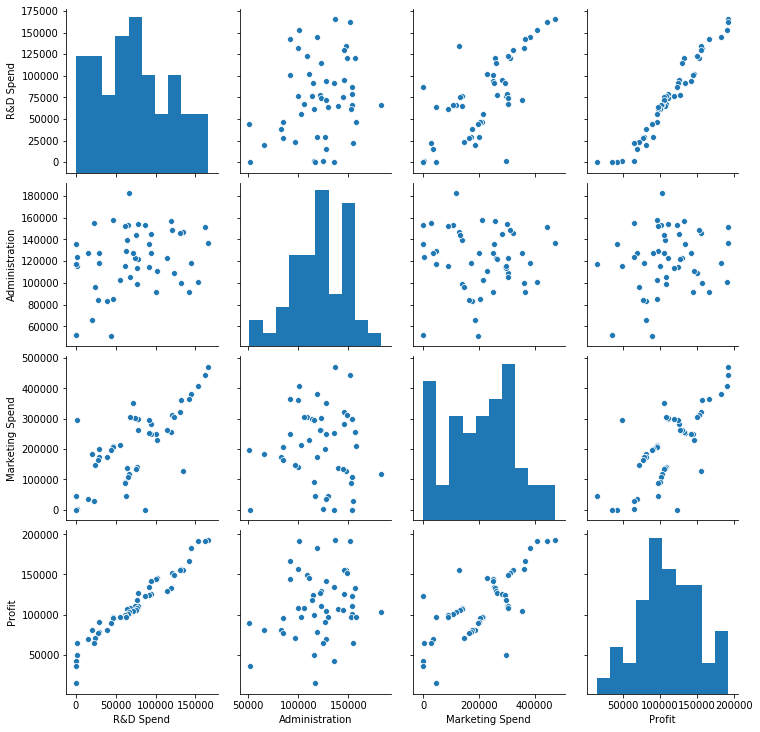

In [5]:
sns.pairplot(df)
plt.show()

As we can see 'R&D Spend' (independent variable) make a linear relationship with 'profit' (dependent variable)
        than rest of the other independent variables

 Another way to check the linear relationship by using the Correlation matrix


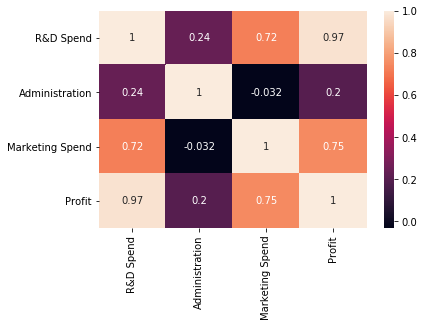

In [6]:
print(" Another way to check the linear relationship by using the Correlation matrix")
sns.heatmap(df.corr(), annot=True)
plt.show()

# Simple Linear Regression

In [0]:
X = df['R&D Spend'].values.reshape(-1,1)
y = df.Profit.values

# Split the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Fit Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
intercept = np.round(regressor.intercept_ ,2)
slope = np.round(regressor.coef_ , 2)
print(f"The intercept and slope of the line best fit--> intercept: {intercept}, slope: {slope} ")

print("Regression equations(y= a+bx)--> ", end="")
print( f"y= {intercept} + {slope[0]}*X1 ")

The intercept and slope of the line best fit--> intercept: 48416.3, slope: [0.85] 
Regression equations(y= a+bx)--> y= 48416.3 + 0.85*X1 


In [10]:
y_pred = regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("R^2 score:", r2_score(y_test, y_pred))
print("rmse:", round(np.sqrt(mse),2))

R^2 score: 0.9464587607787219
rmse: 8274.87


# Plot Regression Line

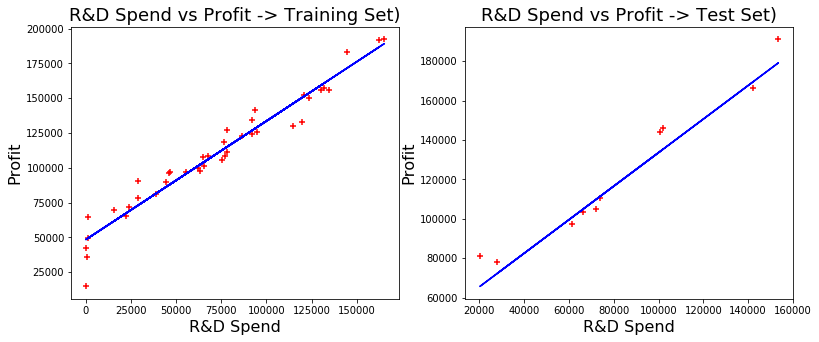

In [13]:
fig = plt.figure(figsize=(20,11))
ax0 = fig.add_subplot(2,3,1)
ax1 = fig.add_subplot(2,3,2)

ax0.scatter(x=X_train,y=y_train,color='red', marker='+')
ax0.plot(X_train, regressor.predict(X_train), color = 'blue')
ax0.set_xlabel("R&D Spend", size=16)
ax0.set_ylabel("Profit", size=16)
ax0.set_title("R&D Spend vs Profit -> Training Set)", size=18)

ax1.scatter(x=X_test,y=y_test,color='red', marker='+')
ax1.plot(X_test, regressor.predict(X_test), color = 'blue')
ax1.set_xlabel("R&D Spend", size=16)
ax1.set_ylabel("Profit", size=16)
ax1.set_title("R&D Spend vs Profit -> Test Set)", size=18)

plt.show()



In conclusion, looking at the R² value, we have 0.946. Therefore, about 94.6% of the variability in profit is explained by the R&D Spend. This is good to predict the profit but not the best because RMSE value is high. 

we can improve the model by using other features or by training the model on large dataset and we can also displays a comprehensive table with statistical info generated by statsmodels. This information can provide you additional 
insights about the model used (such as the fit of the model, standard errors, etc).